# Backward Selection

In [ ]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        print(combo)
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

('overall', 'potential', 'wage_eur', 'release_clause_eur', 'passing', 'dribbling', 'attacking_short_passing', 'skill_ball_control', 'movement_reactions', 'mentality_composure', 'Avg_Att')
('overall', 'potential', 'wage_eur', 'release_clause_eur', 'passing', 'dribbling', 'attacking_short_passing', 'skill_ball_control', 'movement_reactions', 'mentality_composure', 'international_reputation')
('overall', 'potential', 'wage_eur', 'release_clause_eur', 'passing', 'dribbling', 'attacking_short_passing', 'skill_ball_control', 'movement_reactions', 'Avg_Att', 'international_reputation')
('overall', 'potential', 'wage_eur', 'release_clause_eur', 'passing', 'dribbling', 'attacking_short_passing', 'skill_ball_control', 'mentality_composure', 'Avg_Att', 'international_reputation')
('overall', 'potential', 'wage_eur', 'release_clause_eur', 'passing', 'dribbling', 'attacking_short_passing', 'movement_reactions', 'mentality_composure', 'Avg_Att', 'international_reputation')
('overall', 'potential', '

In [ ]:
models_bwd

,RSS,model
1,1.187849,<statsmodels.regression.linear_model.Regressio...
2,0.991666,<statsmodels.regression.linear_model.Regressio...
3,0.984438,<statsmodels.regression.linear_model.Regressio...
4,0.980554,<statsmodels.regression.linear_model.Regressio...
5,0.975198,<statsmodels.regression.linear_model.Regressio...
6,0.973462,<statsmodels.regression.linear_model.Regressio...
7,0.972784,<statsmodels.regression.linear_model.Regressio...
8,0.971784,<statsmodels.regression.linear_model.Regressio...
9,0.97066,<statsmodels.regression.linear_model.Regressio...
10,0.970613,<statsmodels.regression.linear_model.Regressio...


In [ ]:
# Gets the second element from each row ('model') and pulls out its rsquared attribute
models_bwd.apply(lambda row: row[1].rsquared, axis=1)

1     0.956825
2     0.963955
3     0.964218
4     0.964359
5     0.964554
6     0.964617
7     0.964642
8     0.964678
9     0.964719
10    0.964721
11    0.964721
dtype: float64

Text(0, 0.5, 'BIC')

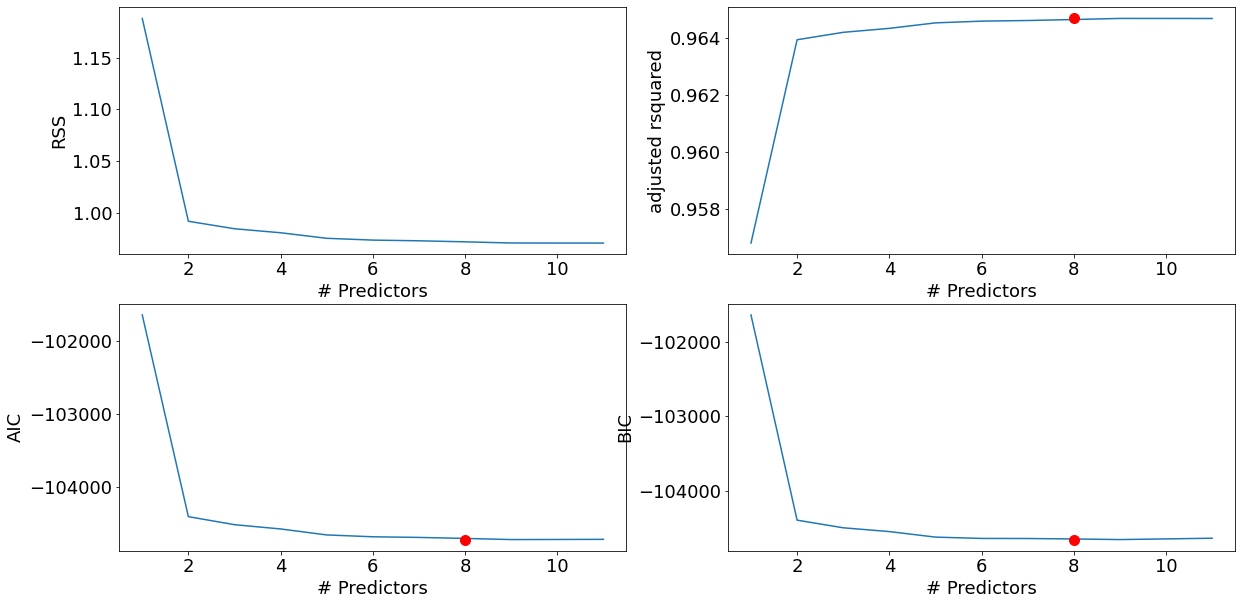

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_bwd["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_bwd.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_bwd.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_bwd.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

# Forward Selection

In [ ]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    print(models_fwd.loc[i])
    predictors = models_fwd.loc[i]["model"].model.exog_names
    print(predictors)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  12 models on 1 predictors in 0.12051630020141602 seconds.
RSS                                               1.187849
model    <statsmodels.regression.linear_model.Regressio...
Name: 1, dtype: object
['release_clause_eur']
Processed  11 models on 2 predictors in 0.11545252799987793 seconds.
RSS                                               0.991666
model    <statsmodels.regression.linear_model.Regressio...
Name: 2, dtype: object
['release_clause_eur', 'wage_eur']
Processed  10 models on 3 predictors in 0.11911797523498535 seconds.
RSS                                               0.983493
model    <statsmodels.regression.linear_model.Regressio...
Name: 3, dtype: object
['release_clause_eur', 'wage_eur', 'international_reputation']
Processed  9 models on 4 predictors in 0.14713358879089355 seconds.
RSS                                               0.981297
model    <statsmodels.regression.linear_model.Regressio...
Name: 4, dtype: object
['release_clause_eur', 'wage_eur', 'inte

In [ ]:
models_fwd

,RSS,model
1,1.187849,<statsmodels.regression.linear_model.Regressio...
2,0.991666,<statsmodels.regression.linear_model.Regressio...
3,0.983493,<statsmodels.regression.linear_model.Regressio...
4,0.981297,<statsmodels.regression.linear_model.Regressio...
5,0.975198,<statsmodels.regression.linear_model.Regressio...
6,0.973462,<statsmodels.regression.linear_model.Regressio...
7,0.972331,<statsmodels.regression.linear_model.Regressio...
8,0.971789,<statsmodels.regression.linear_model.Regressio...
9,0.971572,<statsmodels.regression.linear_model.Regressio...
10,0.970613,<statsmodels.regression.linear_model.Regressio...


In [ ]:
# Gets the second element from each row ('model') and pulls out its rsquared attribute
models_fwd.apply(lambda row: row[1].rsquared, axis=1)

1     0.956825
2     0.963955
3     0.964252
4     0.964332
5     0.964554
6     0.964617
7     0.964658
8     0.964678
9     0.964686
10    0.964721
11    0.964721
12    0.964722
dtype: float64

Text(0, 0.5, 'BIC')

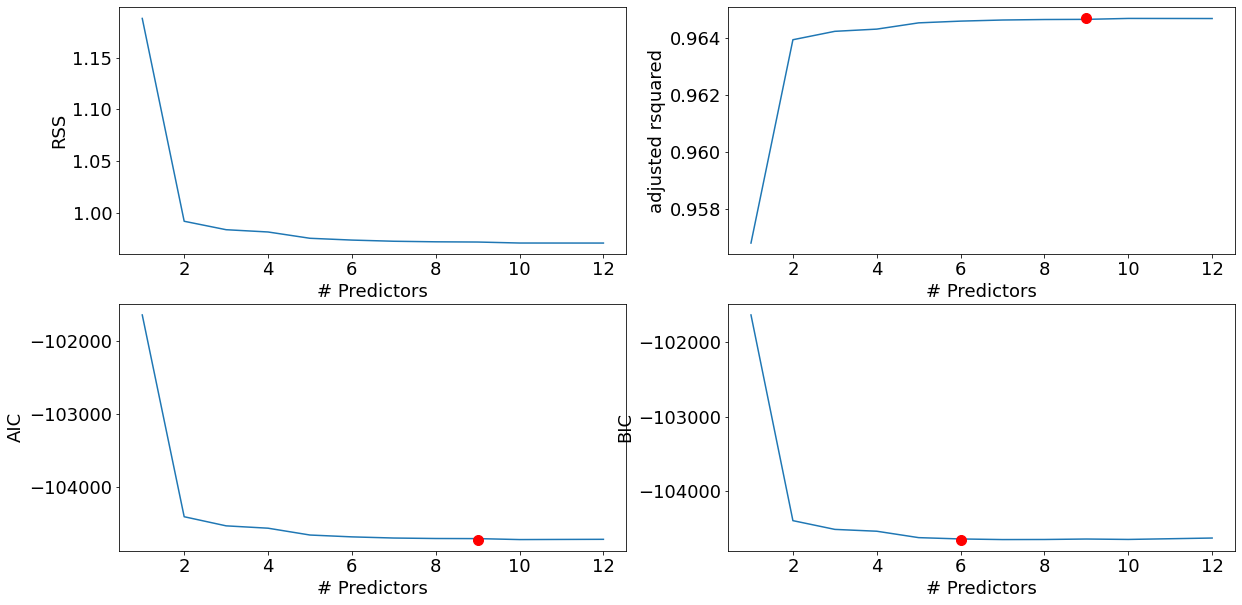

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_fwd["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_fwd.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_fwd.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_fwd.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [ ]:
#Need at least 2 predictors

# Best Subset Selection

In [ ]:
import pandas as pd
data = pd.read_csv('scaled_data.csv')

In [ ]:
#We have too many columns in x, must drop some to perform variable selection
corr = abs(data.corr().loc['value_eur'])
corr = corr[corr<0.4]
cols_to_drop = corr.index.to_list()
data = data.drop(cols_to_drop, axis=1)

In [ ]:
y = data.value_eur
X = data.drop(['value_eur'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size=0.10,
                                                  shuffle=True,
                                                  random_state=324
                                                 )

In [ ]:
import statsmodels.api as sm
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,x_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(x_train[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [ ]:
import itertools
import time
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Create datafrme and add results
    models = pd.DataFrame(results)
    
    # Choose the model with the min RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,7):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 12 models on 1 predictors in 0.11710953712463379 seconds.
Processed 66 models on 2 predictors in 0.7588624954223633 seconds.
Processed 220 models on 3 predictors in 3.0412192344665527 seconds.
Processed 495 models on 4 predictors in 8.318461656570435 seconds.
Processed 792 models on 5 predictors in 19.264129161834717 seconds.
Processed 924 models on 6 predictors in 24.222251653671265 seconds.
Total elapsed time: 56.226288080215454 seconds.


In [ ]:
models_best

,RSS,model
1,1.187849,<statsmodels.regression.linear_model.Regressio...
2,0.991666,<statsmodels.regression.linear_model.Regressio...
3,0.983493,<statsmodels.regression.linear_model.Regressio...
4,0.980554,<statsmodels.regression.linear_model.Regressio...
5,0.975198,<statsmodels.regression.linear_model.Regressio...
6,0.973462,<statsmodels.regression.linear_model.Regressio...


In [ ]:
# Gets the second element from each row ('model') and pulls out its rsquared attribute
models_best.apply(lambda row: row[1].rsquared, axis=1)

1    0.956825
2    0.963955
3    0.964252
4    0.964359
5    0.964554
6    0.964617
dtype: float64

Text(0, 0.5, 'BIC')

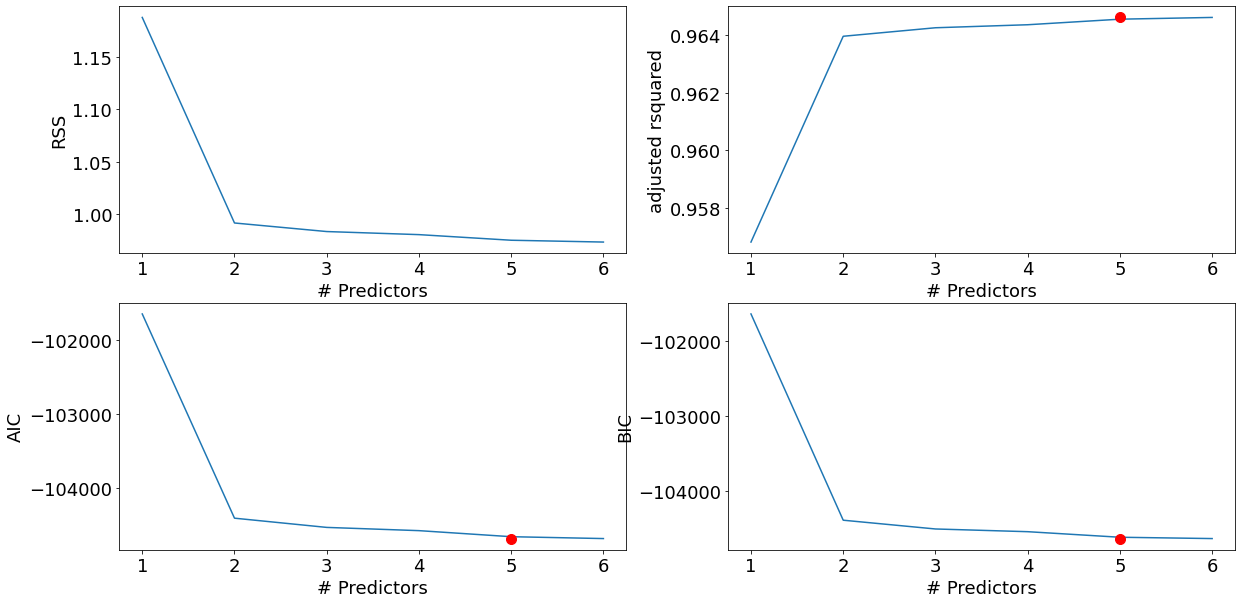

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_best["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

Need 5

# Subset selection Summary

In [ ]:
models_best

,RSS,model
1,1.187849,<statsmodels.regression.linear_model.Regressio...
2,0.991666,<statsmodels.regression.linear_model.Regressio...
3,0.983493,<statsmodels.regression.linear_model.Regressio...
4,0.980554,<statsmodels.regression.linear_model.Regressio...
5,0.975198,<statsmodels.regression.linear_model.Regressio...
6,0.973462,<statsmodels.regression.linear_model.Regressio...


In [ ]:
print("------------")
print("Best Subset:")
print("------------")
print(models_best.loc[5, "model"].params)

------------
Best Subset:
------------
overall                     0.007668
wage_eur                    0.086366
release_clause_eur          0.865717
attacking_short_passing    -0.007427
international_reputation    0.001814
dtype: float64


In [ ]:
best_model_best = models_best.loc[5, "model"]
best_model_best

In [ ]:
print(best_model_best.params)

overall                     0.007668
wage_eur                    0.086366
release_clause_eur          0.865717
attacking_short_passing    -0.007427
international_reputation    0.001814
dtype: float64


In [ ]:
models_fwd

,RSS,model
1,1.187849,<statsmodels.regression.linear_model.Regressio...
2,0.991666,<statsmodels.regression.linear_model.Regressio...
3,0.983493,<statsmodels.regression.linear_model.Regressio...
4,0.981297,<statsmodels.regression.linear_model.Regressio...
5,0.975198,<statsmodels.regression.linear_model.Regressio...
6,0.973462,<statsmodels.regression.linear_model.Regressio...
7,0.972331,<statsmodels.regression.linear_model.Regressio...
8,0.971789,<statsmodels.regression.linear_model.Regressio...
9,0.971572,<statsmodels.regression.linear_model.Regressio...
10,0.970613,<statsmodels.regression.linear_model.Regressio...


In [ ]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[9, "model"].params)

-----------------
Foward Selection:
-----------------
release_clause_eur          0.862602
wage_eur                    0.085719
international_reputation    0.002019
attacking_short_passing    -0.009500
overall                     0.010106
movement_reactions         -0.004695
potential                   0.003216
passing                     0.003801
skill_ball_control         -0.001832
dtype: float64


In [ ]:
models_bwd

,RSS,model
1,1.187849,<statsmodels.regression.linear_model.Regressio...
2,0.991666,<statsmodels.regression.linear_model.Regressio...
3,0.984438,<statsmodels.regression.linear_model.Regressio...
4,0.980554,<statsmodels.regression.linear_model.Regressio...
5,0.975198,<statsmodels.regression.linear_model.Regressio...
6,0.973462,<statsmodels.regression.linear_model.Regressio...
7,0.972784,<statsmodels.regression.linear_model.Regressio...
8,0.971784,<statsmodels.regression.linear_model.Regressio...
9,0.97066,<statsmodels.regression.linear_model.Regressio...
10,0.970613,<statsmodels.regression.linear_model.Regressio...


In [ ]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[8, "model"].params)

-------------------
Backward Selection:
-------------------
overall                     0.011560
wage_eur                    0.085078
release_clause_eur          0.864235
dribbling                   0.006148
attacking_short_passing    -0.006121
skill_ball_control         -0.006206
movement_reactions         -0.004952
international_reputation    0.002159
dtype: float64


# Compare Feature Selection techniques

In [1]:
#Use only best variables - they appear in all 3 selection techniques. 
models_best = ['overall', 'wage_eur', 'release_clause_eur', 'attacking_short_passing', 'international_reputation']
models_forward = ['release_clause_eur', 'wage_eur', 'international_reputation', 'attacking_short_passing', 'overall', 'movement_reactions', 'potential', 'passing', 'skill_ball_control']
models_backward = ['overall', 'wage_eur', 'release_clause_eur', 'dribbling', 'attacking_short_passing', 'skill_ball_control', 'movement_reactions', 'international_reputation']

In [4]:
import numpy as np
import pandas as pd
df = pd.DataFrame(list(zip(models_best, models_forward, models_backward)), columns = ['Best Subset', 'Foward Selection', 'Backward Selection'])
df

,Best Subset,Foward Selection,Backward Selection
0,overall,release_clause_eur,overall
1,wage_eur,wage_eur,wage_eur
2,release_clause_eur,international_reputation,release_clause_eur
3,attacking_short_passing,attacking_short_passing,dribbling
4,international_reputation,overall,attacking_short_passing
